# About Company
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customers first apply for home loans and after that, the company validates the customer eligibility for loan.

## Problem
Company wants to automate the loan eligibility process (real time) based on customers detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments for those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

COLUMN DESCRIPTIONS:

**Columns**	                          **Description**

#Loan_ID  ----------------------->	  Unique Loan ID

#Gender	  ----------------------->    Male/ Female

#Married  ----------------------->	  Applicant married (Y/N)

#Dependents --------------------->	  Number of dependents

#Education  --------------------->	  Applicant Education (Graduate/ Under Graduate)

#Self_Employed  ----------------->    Self employed (Y/N)

#ApplicantIncome  --------------->	  Applicant income

#CoapplicantIncome --------------->	  Coapplicant income

#LoanAmount	--------------->          Loan amount in thousands

#Loan_Amount_Term --------------->	  Term of loan in months

#Credit_History ------------------>	  credit history meets guidelines

#Property_Area ------------------>	  Urban/ Semi Urban/ Rural

#Loan_Status -------------------->	  Loan approved (Y/N)

In [1]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

#Importing libraries for data analysis and cleaning
import numpy as np
import pandas as pd

#importing visualisation libraries for data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
init_notebook_mode(connected=True)

#load datasets
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')

#per describtion, loan amount is in 1000's
train['LoanAmount'] = train['LoanAmount'] *1000
test['LoanAmount'] = test['LoanAmount'] *1000

## DATA PREPROCESSING AND VISUALISATION

In [2]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128000.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66000.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120000.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141000.0,360.0,1.0,Urban,Y


In [3]:
#Check for null/empty values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
#check for duplicated data
train.duplicated().sum()

0

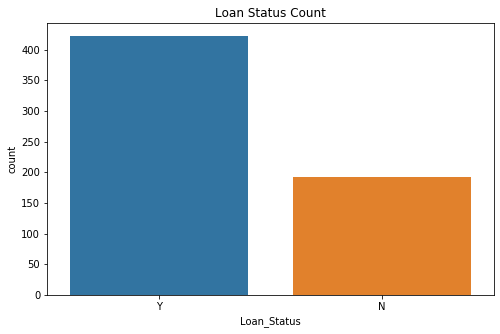

In [5]:
#checking the distribution of the target column (Loan Status)
plt.figure(figsize=(8,5))
plt.title('Loan Status Count')
sns.countplot(data=train,x='Loan_Status');

In [6]:
round(train['Loan_Status'].value_counts(normalize=True),2)

Y    0.69
N    0.31
Name: Loan_Status, dtype: float64

The target column is distributed between 69% and 31% for YES and NO respectively

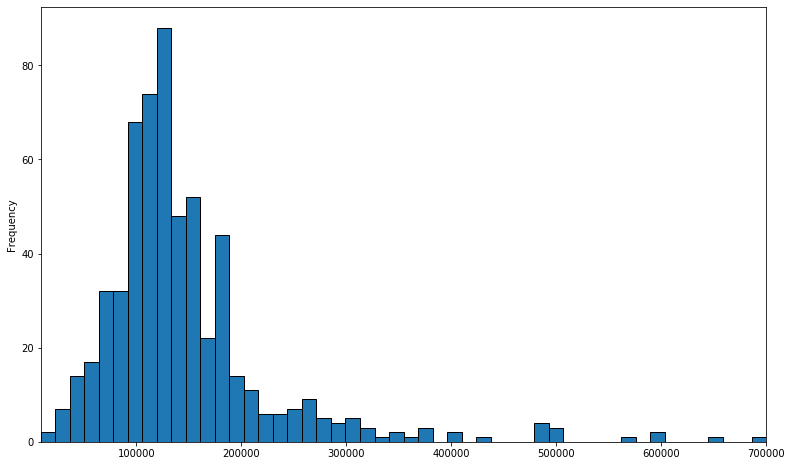

In [7]:
#Check for the distribution of loan amount
train['LoanAmount'].plot(kind='hist',figsize=(13,8),bins=50,edgecolor='k').autoscale(axis='x',tight=True)

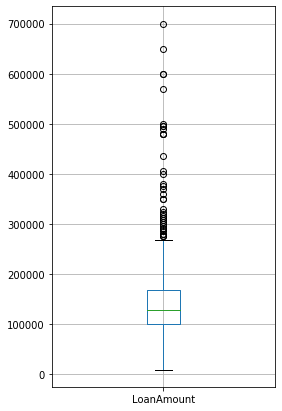

In [8]:
train.boxplot(column='LoanAmount',figsize=(4,7));

The graphical representation shows that the loan amount is skewed to the right in the histogram and with outliers showed clearly in the box plot. This would be tackled later on in this analysis

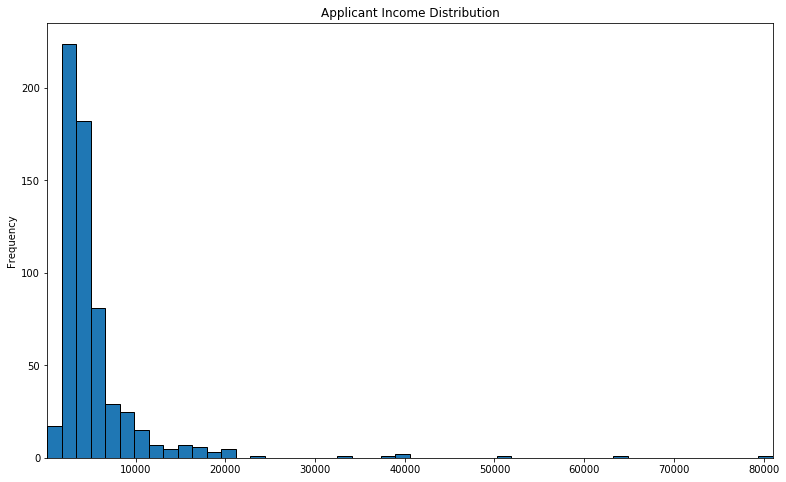

In [9]:
#Check for the distribution of loan amount
train['ApplicantIncome'].plot(kind='hist',figsize=(13,8),bins=50,edgecolor='k',title='Applicant Income Distribution').autoscale(axis='x',tight=True)

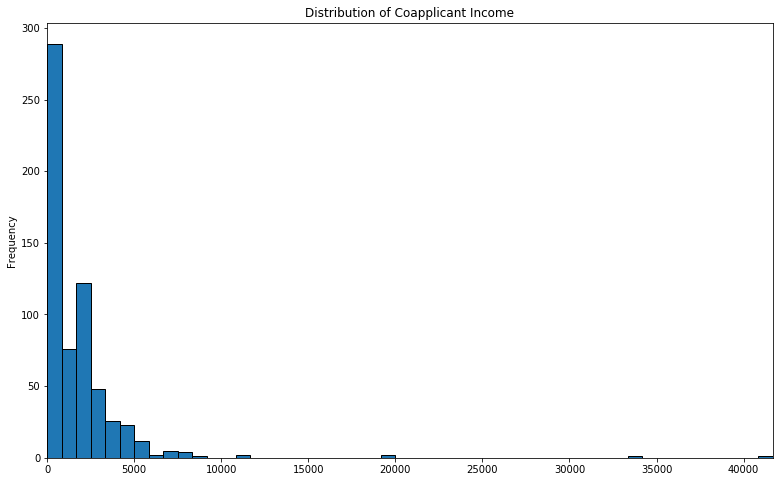

In [10]:
#Check for the distribution of loan amount
train['CoapplicantIncome'].plot(kind='hist',figsize=(13,8),bins=50,edgecolor='k',title='Distribution of Coapplicant Income').autoscale(axis='x',tight=True)

In [11]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128000.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66000.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120000.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141000.0,360.0,1.0,Urban,Y


The countplot shows most loans are approved for people in the **Semiurban areas** with a count of 179 for Y. The less approved being the rural property areas, have a count of 110 for Y.

In [12]:
pd.DataFrame(train.groupby(['Property_Area','Loan_Status'])['Loan_Status'].count())

Loan_Status
Property_Area Loan_Status             
Rural         N                     69
              Y                    110
Semiurban     N                     54
              Y                    179
Urban         N                     69
              Y                    133

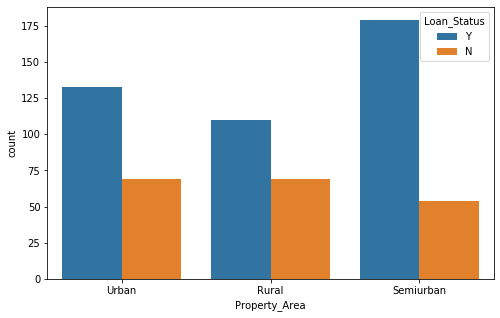

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(data=train,x='Property_Area',hue='Loan_Status');

In [14]:
pd.DataFrame(train.groupby(['Property_Area','Education'])['Loan_Status'].count())

Loan_Status
Property_Area Education                
Rural         Graduate              131
              Not Graduate           48
Semiurban     Graduate              187
              Not Graduate           46
Urban         Graduate              162
              Not Graduate           40

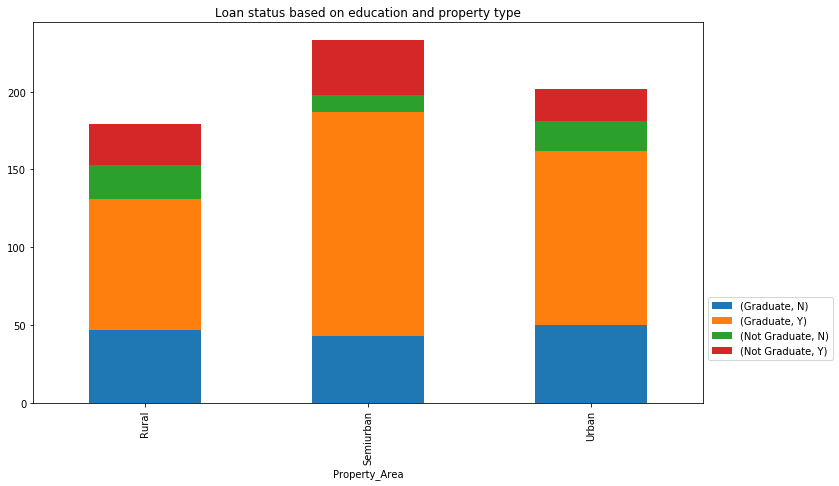

In [15]:
a = pd.crosstab(train['Property_Area'],[train['Education'],train['Loan_Status']])
a.plot(kind='bar',stacked=True,figsize=(12,7),legend=True,title='Loan status based on education and property type').legend(loc=3, bbox_to_anchor=(1.0,0.1));

The above barplot shows that the loan status are approved mostly for **Graduates**. Those under the 'Semiurban' property have a higher probabilty of getting their loans approved if they are graduates.

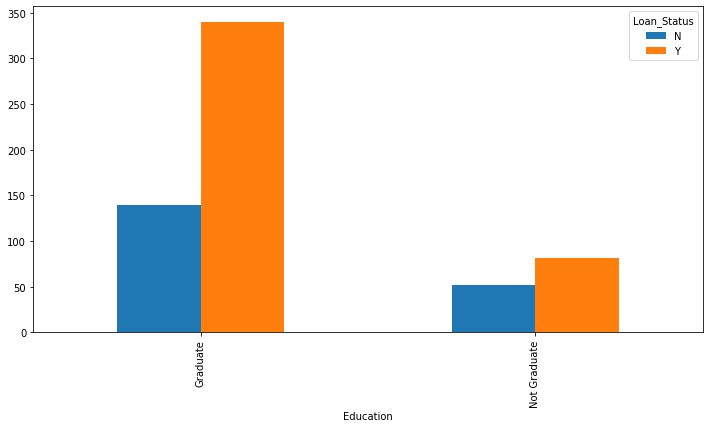

In [16]:
pd.crosstab(train['Education'],train['Loan_Status']).plot(kind='bar',figsize=(12,6));

In [17]:
pd.DataFrame(train.groupby(['Education','Credit_History','Loan_Status'])['Loan_Status'].count())

Loan_Status
Education    Credit_History Loan_Status             
Graduate     0.0            N                     57
                            Y                      6
             1.0            N                     73
                            Y                    307
Not Graduate 0.0            N                     25
                            Y                      1
             1.0            N                     24
                            Y                     71

#### Lets analyse further to see if being a graduate with credit history contributes further into loan status approval

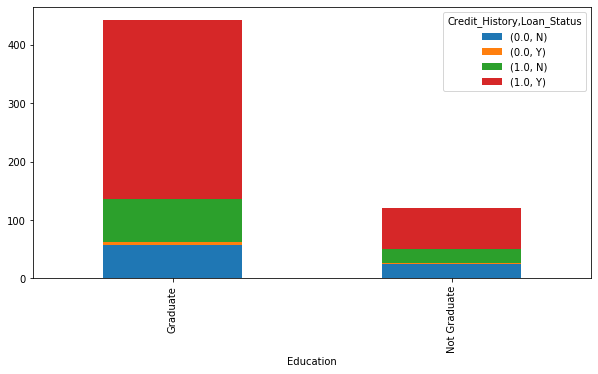

In [18]:
b = pd.crosstab(train['Education'],[train['Credit_History'],train['Loan_Status']])
b.plot(kind='bar',stacked=True,figsize=(10,5));

#### Clearly it is showed from the data above that being a graduate with credit history gives one the upper hand of having a loan approved.

#### Further analysis

Analysing credit history and its impact on loan_status and collectively, the impact of credit history, education,and employment.

In [19]:
pd.DataFrame(train.groupby(['Credit_History','Loan_Status'])['Loan_Status'].count())

Loan_Status
Credit_History Loan_Status             
0.0            N                     82
               Y                      7
1.0            N                     97
               Y                    378

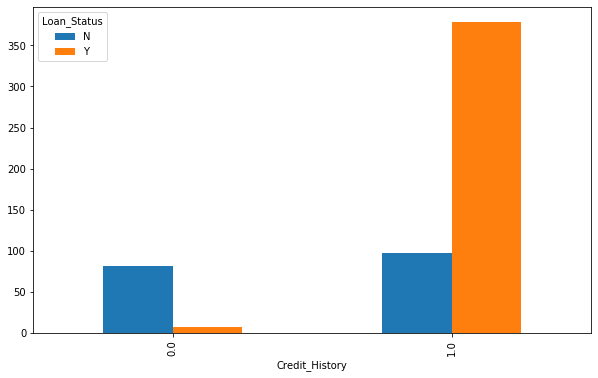

In [20]:
c = pd.crosstab(train['Credit_History'],train['Loan_Status'])
c.plot(kind='bar',figsize=(10,6));

In [21]:
pd.DataFrame(train.groupby(['Education','Self_Employed','Credit_History'])['Loan_Status'].count())

Loan_Status
Education    Self_Employed Credit_History             
Graduate     No            0.0                      52
                           1.0                     311
             Yes           0.0                      10
                           1.0                      50
Not Graduate No            0.0                      24
                           1.0                      76
             Yes           0.0                       2
                           1.0                      13

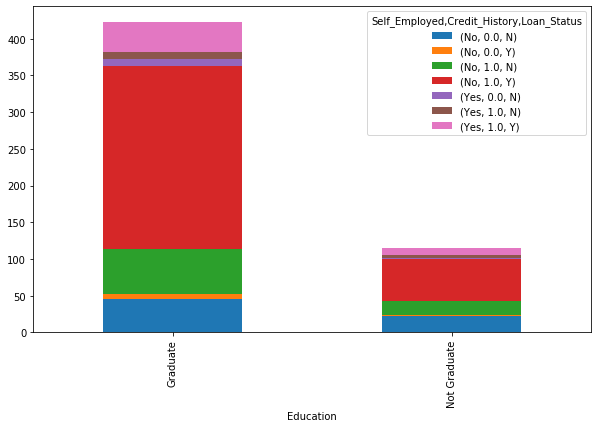

In [22]:
d = pd.crosstab(train['Education'],[train['Self_Employed'],train['Credit_History'],train['Loan_Status']])
d.plot(kind='bar',stacked=True,figsize=(10,6),legend=True);

### Conclusion

From this analysis, the barplot shows that the two major factors contributing to loan status approval or decline are **credit_history** and being a **graduate**. Where **credit history is the main contributing factor here**.

Lets see if loans are fairly approved among males and females

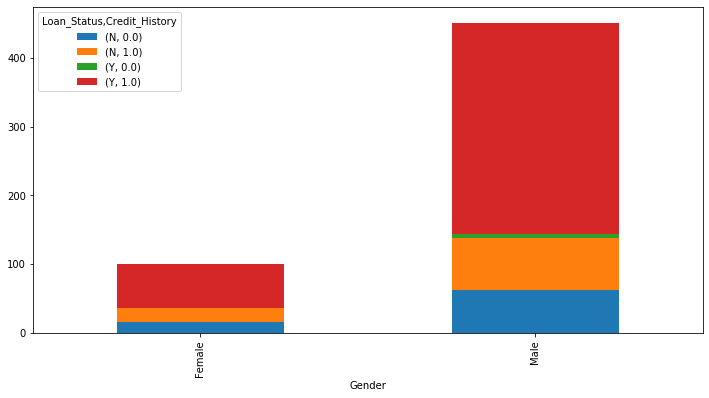

In [23]:
pd.crosstab(train['Gender'],[train['Loan_Status'],train['Credit_History']]).plot(kind='bar',stacked=True,figsize=(12,6));

In [24]:
pd.DataFrame(train.groupby(['Gender','Credit_History','Loan_Status'])['Loan_Status'].count())

Loan_Status
Gender Credit_History Loan_Status             
Female 0.0            N                     16
                      Y                      1
       1.0            N                     20
                      Y                     64
Male   0.0            N                     63
                      Y                      6
       1.0            N                     75
                      Y                    307

In [25]:
print('Total count of male applicants are', len(train[train['Gender'] == 'Male']))
print('Total count of female applicants are', len(train[train['Gender'] == 'Female']))

Total count of male applicants are 489
Total count of female applicants are 112


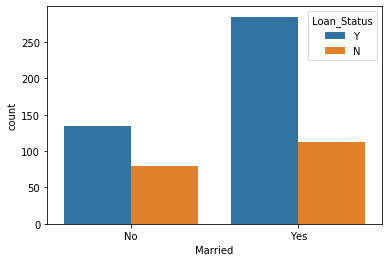

In [26]:
sns.countplot(data=train,x='Married',hue='Loan_Status');

In [27]:
round(100 * train.groupby('Married')['Loan_Status'].value_counts(normalize=True))

Married  Loan_Status
No       Y              63.0
         N              37.0
Yes      Y              72.0
         N              28.0
Name: Loan_Status, dtype: float64

In [28]:
print('Total count of married applicants are', len(train[train['Married'] == 'Yes']))
print('Total count of single applicants are', len(train[train['Married'] == 'No']))

Total count of married applicants are 398
Total count of single applicants are 213


Married couples have a slight possibility of having their loans approved

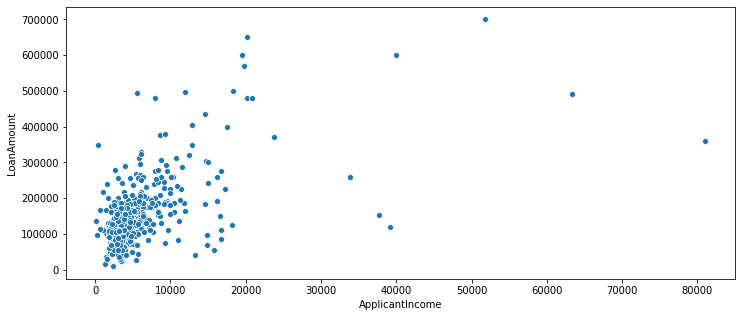

In [29]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=train,x='ApplicantIncome',y='LoanAmount');

<Figure size 864x360 with 0 Axes>

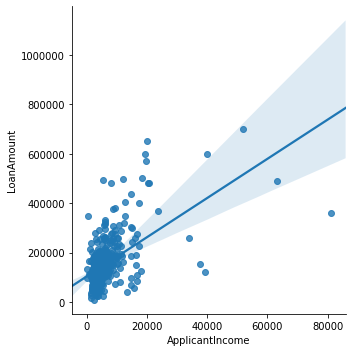

In [30]:
plt.figure(figsize=(12,5))
sns.lmplot(data=train,x='ApplicantIncome',y='LoanAmount');

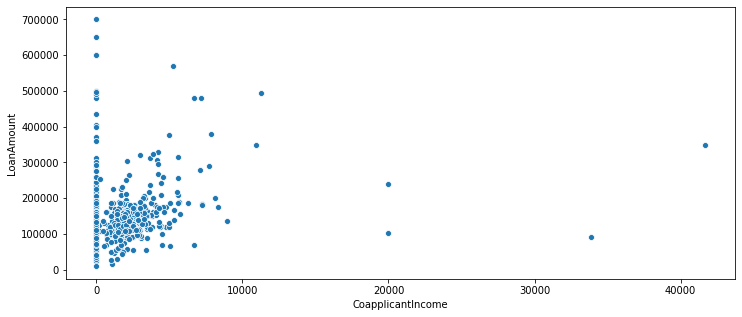

In [31]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=train,x='CoapplicantIncome',y='LoanAmount');

Zero here indicated that the applicants didnt have coapplicants for the loan application

In [32]:
px.scatter(train,x='ApplicantIncome',y='LoanAmount',color='Loan_Status',title='LOAN STATUS BASED ON APPLICANT INCOME')

In [33]:
px.scatter(train,x='ApplicantIncome',y='LoanAmount',color='Credit_History',facet_col='Loan_Status',
           color_continuous_scale=["red", "green", "blue"],title='LOAN STATUS BASED ON APPLICANTINCOME AND CREDIT HISTORY')

In [34]:
px.scatter(train,y='LoanAmount',x='CoapplicantIncome',color='Loan_Status',title='LOAN STATUS BASED ON COAPPLICANT INCOME')

The scatterplot shows that most people without coapplicant incomes had their loan status declined.

In [35]:
px.scatter(train,x='CoapplicantIncome',y='LoanAmount',color='Credit_History',facet_col='Loan_Status',
           color_continuous_scale=["red", "green", "blue"],title='LOAN STATUS BASED ON COAPPLICANTINCOME AND CREDIT HISTORY')

#### Examining depedants

In [36]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

There are more with no dependants

In [37]:
temp = train.dropna()

In [38]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
temp['Loan_Status'] = encoder.fit_transform(temp['Loan_Status'])
temp['Property_Area'] = encoder.fit_transform(temp['Property_Area'])
temp['Education'] = encoder.fit_transform(temp['Education'])

In [39]:
temp['Dependents'] = encoder.fit_transform(temp['Dependents'])
temp['Married'] = encoder.fit_transform(temp['Married'])
temp['Self_Employed'] = encoder.fit_transform(temp['Self_Employed'])
temp['Gender'] = encoder.fit_transform(temp['Gender'])

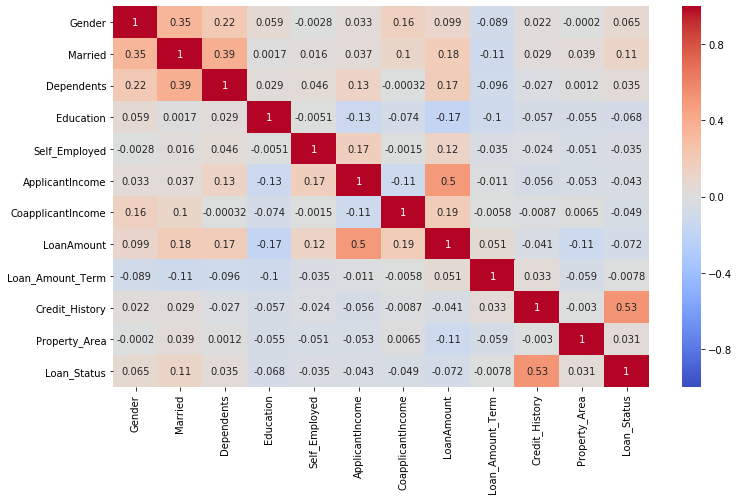

In [40]:
plt.figure(figsize=(12,7))
ax = sns.heatmap(temp.corr(),cmap='coolwarm',annot=True,vmax=1,vmin=-1);
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

In [41]:
train['Loan_Amount_Term'].value_counts().sort_values(ascending=False)

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [42]:
train[train['Loan_Amount_Term'] == 120.0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
14,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17000.0,120.0,1.0,Urban,Y
94,LP001325,Male,No,0,Not Graduate,No,3620,0.0,25000.0,120.0,1.0,Semiurban,Y
133,LP001482,Male,Yes,0,Graduate,Yes,3459,0.0,25000.0,120.0,1.0,Semiurban,Y


Coapplicant and applcant income serves as a determinant for loan amount. Lets add them together as a determinant for loan amount approval

### Observations

In [43]:
train.median()

ApplicantIncome        3812.5
CoapplicantIncome      1188.5
LoanAmount           128000.0
Loan_Amount_Term        360.0
Credit_History            1.0
dtype: float64

In [44]:
train.mean()

ApplicantIncome        5403.459283
CoapplicantIncome      1621.245798
LoanAmount           146412.162162
Loan_Amount_Term        342.000000
Credit_History            0.842199
dtype: float64

1. Loan amount is skewed to the right. This is because there are a few customers applying for large loans whiles the majority are applying for loans within the median (60,000 - 200,000). This resulted in the outliers seen in the boxplot

2. Loans are mostly approved for property areas in the semiurban areas followed by urban areas where majority are graduates.

3. Credit history is a high determinant for the status of loan approval. There is a positive correlation of 0.5

4. Married couples have a slight possibility of having their loans approved

5. There is also a slight correlation with coapplicant income and the loan amount.


#### Filling out missing values based on observations

In [45]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [46]:
train_shape = train.shape
train_shape

(614, 13)

In [47]:
#Save loanID
train_ID= train['Loan_ID']
train = train.drop('Loan_ID',axis=1)

In [48]:
#filling n/a with the most occuring for genders
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])

In [49]:
#filling values for married
train['Married'] = train['Married'].fillna(train['Married'].mode()[0])

In [50]:
#filling values for dependents
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])

In [51]:
#filling values for self_employed
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])

In [52]:
avg_loans = train.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
avg_loans

Education,Graduate,Not Graduate
Self_Employed,,
No,130000.0,113000.0
Yes,157500.0,130000.0


In [53]:
avg_loans.columns

Index(['Graduate', 'Not Graduate'], dtype='object', name='Education')

In [54]:
def values(x):
    return avg_loans.loc[x['Self_Employed'],x['Education']]

In [55]:
train['LoanAmount'] = train['LoanAmount'].fillna(train[train['LoanAmount'].isnull()].apply(values, axis=1))

From the observation some customers are likely to apply for larger loans and this is the reason for the loan amount being rightly skewed. Lets log the loan amount

In [56]:
#filling based on the most frequent
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])

From the observations above, credit history is a high determinant for loan approval (correlation of +0.5) and for that reason, null values for credit history would be filled based on where loan status was approved or declined.

#### Convert Loan_Status to numerical
where Y = 1
where N = 0

In [57]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
train['Loan_Status'] = encoder.fit_transform(train['Loan_Status'])

In [58]:
train[train['Credit_History'].isnull()].head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,Male,No,1,Not Graduate,No,3596,0.0,100000.0,240.0,NaN,Urban,1
24,Male,Yes,1,Graduate,No,3717,2925.0,151000.0,360.0,NaN,Semiurban,0
30,Male,Yes,1,Graduate,No,4166,3369.0,201000.0,360.0,NaN,Urban,0
42,Male,Yes,0,Graduate,No,2400,0.0,75000.0,360.0,NaN,Urban,1
79,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130000.0,360.0,NaN,Semiurban,1


In [59]:
#filling credit_history where loan status was approved
train['Credit_History'] = np.where(((train['Credit_History'].isnull()) & (train['Loan_Status'] ==1)),
                                   1,train['Credit_History'])

#filling credit_history based on where loan status was declined
train['Credit_History'] = np.where(((train['Credit_History'].isnull()) & (train['Loan_Status'] ==0)),
                                   0,train['Credit_History'])

#### Creating Features

In [60]:
#Log transfromations
train['LoanAmount'] = np.log1p(train['LoanAmount'])

In [61]:
#Log transforming features
train['ApplicantIncome'] = np.log1p(train['ApplicantIncome'])
train['CoapplicantIncome'] = np.log1p(train['CoapplicantIncome'])

In [62]:
#coapplicant income and applicant income both serves as determinants for loan status
#log transformation

train['total_income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['total_income'] = np.log1p(train['total_income'])

In [63]:
#Log transformation 
train['Ratio of LoanAmt :Total_Income'] = train['LoanAmount'] / train['total_income']
train['Ratio of LoanAmt :Total_Income'] = np.log1p(train['Ratio of LoanAmt :Total_Income'])

In [64]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income,Ratio of LoanAmt :Total_Income
0,Male,No,0,Graduate,No,8.674197,0.000000,11.775297,360.0,1.0,Urban,1,2.269462,1.822706
1,Male,Yes,1,Graduate,No,8.430327,7.319202,11.759793,360.0,1.0,Rural,0,2.818370,1.643366
2,Male,Yes,0,Graduate,Yes,8.006701,0.000000,11.097425,360.0,1.0,Urban,1,2.197969,1.799884
3,Male,Yes,0,Not Graduate,No,7.857094,7.765993,11.695255,360.0,1.0,Urban,1,2.810793,1.641099
4,Male,No,0,Graduate,No,8.699681,0.000000,11.856522,360.0,1.0,Urban,1,2.272093,1.827501


In [65]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'total_income', 'Ratio of LoanAmt :Total_Income'],
      dtype='object')

In [66]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income,Ratio of LoanAmt :Total_Income
0,Male,No,0,Graduate,No,8.674197,0.000000,11.775297,360.0,1.0,Urban,1,2.269462,1.822706
1,Male,Yes,1,Graduate,No,8.430327,7.319202,11.759793,360.0,1.0,Rural,0,2.818370,1.643366
2,Male,Yes,0,Graduate,Yes,8.006701,0.000000,11.097425,360.0,1.0,Urban,1,2.197969,1.799884
3,Male,Yes,0,Not Graduate,No,7.857094,7.765993,11.695255,360.0,1.0,Urban,1,2.810793,1.641099
4,Male,No,0,Graduate,No,8.699681,0.000000,11.856522,360.0,1.0,Urban,1,2.272093,1.827501


### Categorical Variables and Dummy Variables

In [67]:
train.select_dtypes(['object']).columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

In [68]:
Dummies = pd.get_dummies(train[['Gender','Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']],drop_first=True)
train = train.drop(['Gender','Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'],axis=1)
train = pd.concat([train,Dummies],axis=1)

In [69]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,total_income,Ratio of LoanAmt :Total_Income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,8.674197,0.000000,11.775297,360.0,1.0,1,2.269462,1.822706,1,0,0,0,0,0,0,0,1
1,8.430327,7.319202,11.759793,360.0,1.0,0,2.818370,1.643366,1,1,1,0,0,0,0,0,0
2,8.006701,0.000000,11.097425,360.0,1.0,1,2.197969,1.799884,1,1,0,0,0,0,1,0,1
3,7.857094,7.765993,11.695255,360.0,1.0,1,2.810793,1.641099,1,1,0,0,0,1,0,0,1
4,8.699681,0.000000,11.856522,360.0,1.0,1,2.272093,1.827501,1,0,0,0,0,0,0,0,1


Splitting data for train and test purposes. Where X are the features for training and y is the target(Loan_Status) to be predicted

In [70]:
X = train.drop('Loan_Status',axis=1).values
y = train['Loan_Status'].values

In [71]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [72]:
#Scaling features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Models for predictions

1. Logistic Regression

2. Support Vector Machines Classifier

3. Random Forest Classifiers

4. Neural Networks (Simple Artificial Neural Network)


In [73]:
from sklearn.metrics import classification_report,confusion_matrix

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

### Logistic Regression 

Default parameters (Prediction accuracy  82 %)

Adjusted Parameters (Prediction accuracy 82%)

**Default parameters**

In [75]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
predictions = model_LR.predict(X_test)
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.42      0.58        36
           1       0.80      0.99      0.89        87

    accuracy                           0.82       123
   macro avg       0.87      0.70      0.73       123
weighted avg       0.84      0.82      0.80       123



[[15 21]
 [ 1 86]]


In [77]:
print(accuracy_score(y_test,predictions))

0.8211382113821138


**Tuned hyper-parameters**

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


LR_model2 = LogisticRegression()
tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
              'penalty':['l1','l2']
                   }

LR = GridSearchCV(estimator=LR_model2,
                  param_grid=tuned_parameters,
                  cv=10,
                 scoring='accuracy',n_jobs=-1)

LR.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [79]:
print(LR.best_params_)

{'C': 0.1, 'penalty': 'l2'}


In [80]:
predictions = LR.predict(X_test)
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.42      0.58        36
           1       0.80      0.99      0.89        87

    accuracy                           0.82       123
   macro avg       0.87      0.70      0.73       123
weighted avg       0.84      0.82      0.80       123



[[15 21]
 [ 1 86]]


In [81]:
print(accuracy_score(y_test,predictions))

0.8211382113821138


### Support vector machine classifier 

Default parameters (Prediction accuracy  82 %)

Adjusted Parameters (Prediction accuracy 82%)

**Default parameters**

In [82]:
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [83]:
predictions = model_svc.predict(X_test)
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.42      0.58        36
           1       0.80      0.99      0.89        87

    accuracy                           0.82       123
   macro avg       0.87      0.70      0.73       123
weighted avg       0.84      0.82      0.80       123



[[15 21]
 [ 1 86]]


In [84]:
print(accuracy_score(y_test,predictions))

0.8211382113821138


**Parameter Tuuning**

In [85]:
# Applying Grid Search to find the best model and the best parameters
model_svc2 = SVC()
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
svm = GridSearchCV(estimator = model_svc2,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
svm.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [86]:
print(svm.best_params_)

{'C': 1, 'kernel': 'linear'}


In [87]:
predictions = svm.predict(X_test)
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.42      0.58        36
           1       0.80      0.99      0.89        87

    accuracy                           0.82       123
   macro avg       0.87      0.70      0.73       123
weighted avg       0.84      0.82      0.80       123



[[15 21]
 [ 1 86]]


In [88]:
print(accuracy_score(y_test,predictions))

0.8211382113821138


### Random Forest Classifier

Default parameters (Prediction accuracy  82 %)

Adjusted Parameters (Prediction accuracy 80%)

**Default Parameters**

In [89]:
from sklearn.ensemble import RandomForestClassifier
model_RR = RandomForestClassifier()
model_RR.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [90]:
predictions = model_RR.predict(X_test)
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.47      0.61        36
           1       0.82      0.97      0.88        87

    accuracy                           0.82       123
   macro avg       0.83      0.72      0.75       123
weighted avg       0.83      0.82      0.80       123



[[17 19]
 [ 3 84]]


In [91]:
print(accuracy_score(y_test,predictions))

0.8211382113821138


**Tuned hyperparameters**

In [92]:
model_RR2 = RandomForestClassifier()

tuned_parameters = {'min_samples_leaf': range(10,100,10), 'n_estimators' : range(10,100,10),
                    'max_features':['auto','sqrt','log2']
                    }

rr = GridSearchCV(estimator = model_RR2,
                           param_grid = tuned_parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

rr.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [93]:
rr.best_params_

{'max_features': 'sqrt', 'min_samples_leaf': 20, 'n_estimators': 40}

In [94]:
predictions = rr.predict(X_test)
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.42      0.56        36
           1       0.80      0.97      0.88        87

    accuracy                           0.80       123
   macro avg       0.82      0.69      0.72       123
weighted avg       0.81      0.80      0.78       123



[[15 21]
 [ 3 84]]


In [95]:
print(accuracy_score(y_test,predictions))

0.8048780487804879


### Artificial Neural Networks

Prediction accuracy  82 %

In [96]:
X = train.drop('Loan_Status', axis = 1).values
y = train['Loan_Status'].values

In [97]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
X_train.shape

(429, 16)

In [100]:
y_train.shape

(429,)

In [101]:
#Importing libraries for neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [102]:
#Creating a neural network
model = Sequential()

# input layer
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [103]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [104]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 429 samples, validate on 185 samples
Epoch 1/600
429/429 [==============================] - 1s 1ms/sample - loss: 0.6925 - accuracy: 0.6247 - val_loss: 0.6883 - val_accuracy: 0.7243
Epoch 2/600
429/429 [==============================] - 0s 55us/sample - loss: 0.6852 - accuracy: 0.6620 - val_loss: 0.6820 - val_accuracy: 0.7405
Epoch 3/600
429/429 [==============================] - 0s 51us/sample - loss: 0.6775 - accuracy: 0.6760 - val_loss: 0.6688 - val_accuracy: 0.7351
Epoch 4/600
429/429 [==============================] - 0s 51us/sample - loss: 0.6670 - accuracy: 0.7016 - val_loss: 0.6522 - val_accuracy: 0.7189
Epoch 5/600
429/429 [==============================] - 0s 50us/sample - loss: 0.6567 - accuracy: 0.6946 - val_loss: 0.6374 - val_accuracy: 0.7189
Epoch 6/600
429/429 [==============================] - 0s 51us/sample - loss: 0.6397 - accuracy: 0.6760 - val_loss: 0.6245 - val_accuracy: 0.7189
Epoch 7/600
429/429 [==============================] - 0s 50us/sample - loss: 0

429/429 [==============================] - 0s 50us/sample - loss: 0.4520 - accuracy: 0.8252 - val_loss: 0.4626 - val_accuracy: 0.8270
Epoch 57/600
429/429 [==============================] - 0s 49us/sample - loss: 0.4625 - accuracy: 0.8135 - val_loss: 0.4610 - val_accuracy: 0.8270
Epoch 58/600
429/429 [==============================] - 0s 49us/sample - loss: 0.4553 - accuracy: 0.8159 - val_loss: 0.4616 - val_accuracy: 0.8270
Epoch 59/600
429/429 [==============================] - 0s 49us/sample - loss: 0.4310 - accuracy: 0.8275 - val_loss: 0.4604 - val_accuracy: 0.8216
Epoch 60/600
429/429 [==============================] - 0s 49us/sample - loss: 0.4660 - accuracy: 0.8205 - val_loss: 0.4604 - val_accuracy: 0.8216
Epoch 61/600
429/429 [==============================] - 0s 50us/sample - loss: 0.4486 - accuracy: 0.8275 - val_loss: 0.4606 - val_accuracy: 0.8216
Epoch 62/600
429/429 [==============================] - 0s 48us/sample - loss: 0.4489 - accuracy: 0.8322 - val_loss: 0.4600 - val_a

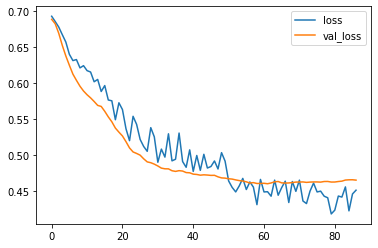

In [105]:
metrics = pd.DataFrame(model.history.history)
metrics[['loss','val_loss']].plot()

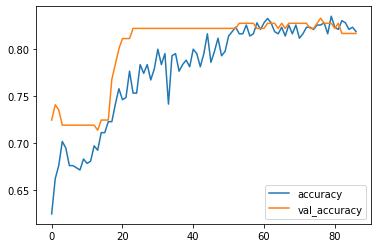

In [106]:
metrics[['accuracy','val_accuracy']].plot()

In [107]:
predictions = model.predict_classes(X_test)

In [108]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.44      0.57        52
           1       0.82      0.96      0.88       133

    accuracy                           0.82       185
   macro avg       0.82      0.70      0.73       185
weighted avg       0.82      0.82      0.80       185



[[ 23  29]
 [  5 128]]


In [109]:
print(accuracy_score(y_test,predictions))

0.8162162162162162


## Conclusion

Seems the Logistic Regression performs better with an **82 % prediction accuracy**.

Now we train the entire dataset on the Logistic regression model

In [110]:
#Training features and target column on train dataset
X = train.drop('Loan_Status',axis=1)  #------> features
y = train['Loan_Status']  #-------> target(loan_status prediction)

In [111]:
#scaling train features
full_scaler = StandardScaler()
scaled_data = full_scaler.fit_transform(X)

In [112]:
#shape of train (features and target)
X.shape,y.shape

((614, 16), (614,))

In [113]:
#training the Logistic regression model(LR)
model_LR.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [125]:
# save the model to disk
import joblib
filename = 'home_loans_model.sav'
joblib.dump(model_LR, filename)

['home_loans_model.sav']

### Test Data

In [114]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110000.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126000.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208000.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100000.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78000.0,360.0,1.0,Urban


In [115]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [116]:
#filling null_values
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed'] = test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])

In [117]:
#fiiling loan amt based on the defined function used on train
test['LoanAmount'] = test['LoanAmount'].fillna(test[test['LoanAmount'].isnull()].apply(values, axis=1))

In [118]:
#filling based on the most frequent
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0])

In [119]:
test['Credit_History'].value_counts()
#filling based on the most frequent
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mode()[0])

In [120]:
#Log_transformations
test['ApplicantIncome'] = np.log1p(test['ApplicantIncome'])
test['CoapplicantIncome'] = np.log1p(test['CoapplicantIncome'])
test['LoanAmount'] = np.log1p(test['LoanAmount'])
test['total_income'] = test['ApplicantIncome'] + test['CoapplicantIncome']
test['total_income'] = np.log1p(test['total_income'])
test['Ratio of LoanAmt:Total_income'] = test['LoanAmount']/test['total_income']
test['Ratio of LoanAmt:Total_income'] = np.log1p(test['Ratio of LoanAmt:Total_income'])

In [121]:
test.select_dtypes(['object']).columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object')

In [122]:
#Save loanID
test_ID= test['Loan_ID']
test = test.drop('Loan_ID',axis=1)

In [123]:
dummies = pd.get_dummies(test[['Gender','Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']],drop_first=True)
test = test.drop(['Gender','Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'],axis=1)
test = pd.concat([test,dummies],axis=1)

In [127]:
#scaling test features
scaled_test = full_scaler.transform(test)

In [128]:
# load the model from disk
loaded_model = joblib.load('home_loans_model.sav')

In [129]:
result = loaded_model.predict(test)

In [136]:
result = np.where(result ==1, 'Y', 'N')

In [144]:
result = pd.Series(result,name='Loan_Status')

In [146]:
test_predictions = pd.concat([test_ID,result],axis=1)

In [148]:
test_predictions['Loan_Status'].value_counts()

Y    307
N     60
Name: Loan_Status, dtype: int64

### Final results 

In [149]:
test_predictions.to_csv('submission_1.csv')